In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Installs
0,Angry Birds,Game,4.5,1000000,"10,000,000+"
1,Facebook,Social,4.2,50000000,"50,000,000+"
2,WhatsApp,Communication,4.7,1000000000,"1,000,000,000+"
3,Instagram,Social,4.5,500000000,"500,000,000+"
4,Spotify,Music & Audio,4.8,100000000,"100,000,000+"


In [3]:
df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(int)
df

,App,Category,Rating,Reviews,Installs
0,Angry Birds,Game,4.5,1000000,10000000
1,Facebook,Social,4.2,50000000,50000000
2,WhatsApp,Communication,4.7,1000000000,1000000000
3,Instagram,Social,4.5,500000000,500000000
4,Spotify,Music & Audio,4.8,100000000,100000000


In [46]:
report = df.groupby("Category").agg(
    TotaleDownload=("Installs", "sum"),
    MediaRating=("Rating", "mean"),
).reset_index()
report = report.sort_values(by="TotaleDownload", ascending=False)
report

,Category,TotaleDownload,MediaRating
0,Communication,1000000000,4.70
3,Social,550000000,4.35
2,Music & Audio,100000000,4.80
1,Game,10000000,4.50


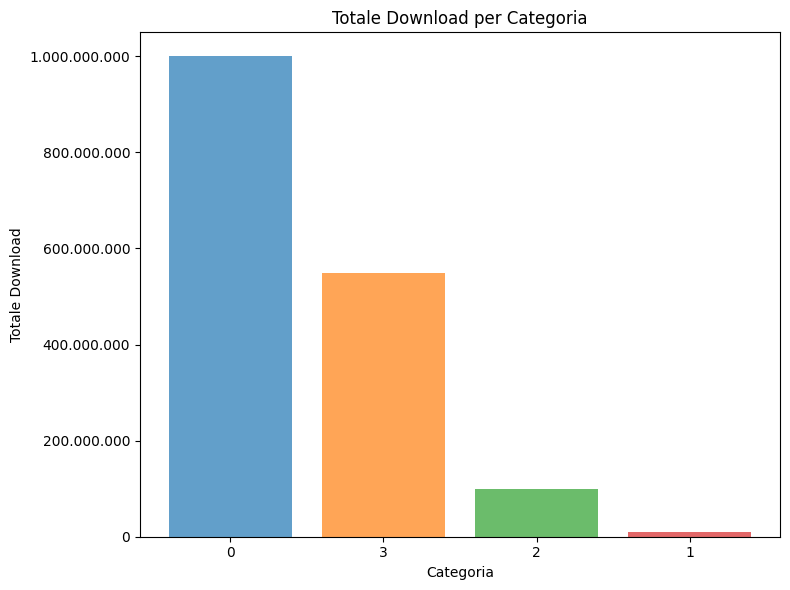

In [51]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 6))
for category in report.index:
    subset = report[report.index == category]
    plt.bar(subset.index.astype(str), subset["TotaleDownload"], label=category, alpha=0.7)

plt.title("Totale Download per Categoria")
plt.xlabel("Categoria")
plt.ylabel("Totale Download")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))
plt.tight_layout()
